In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loan_df = pd.read_csv('loan.csv')

# Display the first few rows of the dataset to verify
loan_df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21328\1091315877.py:1: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df = pd.read_csv('loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Check for missing values
loan_df.isnull().sum()

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
all_util            866007
total_rev_hi_lim     70276
inq_fi              866007
total_cu_tl         866007
inq_last_12m        866007
Length: 74, dtype: int64

In [10]:
# Check the data types of the columns
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

In [4]:
# Summary statistics
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


In [5]:
# Calculate the threshold (10% of total entries)
threshold = len(loan_df) * 0.10

# Drop columns where the number of null values exceeds the threshold
loan_df_cleaned = loan_df.dropna(thresh=threshold, axis=1)

# Display the shape of the cleaned dataset to verify
loan_df_cleaned.shape

(887379, 57)

In [6]:
# Get a list of numeric columns
numeric_cols = loan_df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Display the numeric columns
numeric_cols

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim'],
      dtype='object')

In [7]:
# Replace missing values in numeric columns with the mean (you can change to median if needed)
for col in numeric_cols:
    if loan_df_cleaned[col].isnull().sum() > 0:  # Only process columns with missing values
        # Check skewness of the column to decide between mean and median
        if loan_df_cleaned[col].skew() > 1:  # Highly skewed data, use median
            loan_df_cleaned[col].fillna(loan_df_cleaned[col].median(), inplace=True)
        else:  # Not highly skewed, use mean
            loan_df_cleaned[col].fillna(loan_df_cleaned[col].mean(), inplace=True)

# Verify there are no missing values in the numeric columns
loan_df_cleaned[numeric_cols].isnull().sum()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21328\4084409050.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df_cleaned[col].fillna(loan_df_cleaned[col].median(), inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21328\4084409050.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df_cleaned[col].fillna(loan_df_cleaned[col].mean(), inplace=True)


id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
int_rate                       0
installment                    0
annual_inc                     0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_prncp                0
total_rec_int                  0
total_rec_late_fee             0
recoveries                     0
collection_recovery_fee        0
last_pymnt_amnt                0
collections_12_mths_ex_med     0
mths_since_last_major_derog    0
policy_cod

In [8]:
# Check if there are any missing values left in the dataset
loan_df_cleaned.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       51462
emp_length                      44825
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           761351
purpose                             0
title                             152
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_

In [9]:
# List of unnecessary columns to drop (excluding the ones you want to retain)
columns_to_drop = ['emp_title', 'url', 'desc', 'title', 'policy_code', 'member_id', 'id']

# Drop the unnecessary columns while keeping next_pymnt_d, mths_since_last_delinq, and mths_since_last_record
loan_df_cleaned = loan_df_cleaned.drop(columns=columns_to_drop, axis=1)

# Verify the result
loan_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 50 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    887379 non-null  float64
 1   funded_amnt                  887379 non-null  float64
 2   funded_amnt_inv              887379 non-null  float64
 3   term                         887379 non-null  object 
 4   int_rate                     887379 non-null  float64
 5   installment                  887379 non-null  float64
 6   grade                        887379 non-null  object 
 7   sub_grade                    887379 non-null  object 
 8   emp_length                   842554 non-null  object 
 9   home_ownership               887379 non-null  object 
 10  annual_inc                   887379 non-null  float64
 11  verification_status          887379 non-null  object 
 12  issue_d                      887379 non-null  object 
 13 

In [10]:
# Identify object columns
object_columns = loan_df_cleaned.select_dtypes(include=['object']).columns

# Get the unique values for each object column
for col in object_columns:
    print(f"Unique values in '{col}':\n{loan_df_cleaned[col].unique()}\n")

Unique values in 'term':
[' 36 months' ' 60 months']

Unique values in 'grade':
['B' 'C' 'A' 'E' 'F' 'D' 'G']

Unique values in 'sub_grade':
['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']

Unique values in 'emp_length':
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]

Unique values in 'home_ownership':
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']

Unique values in 'verification_status':
['Verified' 'Source Verified' 'Not Verified']

Unique values in 'issue_d':
['Dec-2011' 'Nov-2011' 'Oct-2011' 'Sep-2011' 'Aug-2011' 'Jul-2011'
 'Jun-2011' 'May-2011' 'Apr-2011' 'Mar-2011' 'Feb-2011' 'Jan-2011'
 'Dec-2010' 'Nov-2010' 'Oct-2010' 'Sep-2010' 'Aug-2010' 'Jul-2010'
 'Jun-2010' 'May-2010' 'Apr-2010' 'Mar-2010' 'Feb-2010' 'Jan-2010'
 'Dec-2009' 'Nov-2009' 'Oct-2009' 'Sep-2009' 'Aug-2009' 'Jul-2

Unique values in 'next_pymnt_d':
[nan 'Feb-2016' 'Jan-2016' 'Sep-2013' 'Feb-2014' 'May-2014' 'Jun-2013'
 'Mar-2012' 'Apr-2012' 'May-2013' 'Aug-2012' 'Aug-2013' 'Jun-2012'
 'Nov-2013' 'Feb-2012' 'Oct-2011' 'Jan-2013' 'Jan-2014' 'Jul-2013'
 'Jul-2015' 'Jan-2012' 'Dec-2012' 'Jun-2011' 'Feb-2013' 'Nov-2011'
 'Nov-2012' 'Dec-2011' 'Aug-2011' 'Sep-2011' 'Apr-2011' 'Mar-2014'
 'Apr-2013' 'Mar-2011' 'Jul-2012' 'Aug-2014' 'Oct-2013' 'Sep-2012'
 'May-2012' 'Apr-2015' 'Jul-2011' 'Dec-2015' 'Dec-2013' 'Jan-2011'
 'Oct-2012' 'Nov-2014' 'Mar-2013' 'Aug-2015' 'Feb-2015' 'May-2015'
 'Jul-2014' 'Nov-2015' 'Sep-2014' 'Oct-2015' 'May-2011' 'Feb-2011'
 'Dec-2014' 'Jun-2015' 'Apr-2014' 'Jan-2015' 'Sep-2015' 'Jun-2014'
 'Nov-2010' 'Oct-2010' 'Dec-2010' 'Mar-2015' 'Oct-2014' 'Jul-2010'
 'Sep-2010' 'May-2010' 'Aug-2010' 'Mar-2010' 'Jun-2010' 'Apr-2010'
 'Feb-2010' 'Dec-2009' 'Nov-2009' 'Oct-2009' 'Jan-2010' 'Sep-2009'
 'Jun-2009' 'Aug-2009' 'Jul-2009' 'May-2009' 'Apr-2009' 'Jan-2009'
 'Oct-2008' 'Feb-2009' 'N

In [11]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for columns with few unique values
label_cols = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status',
              'loan_status', 'pymnt_plan', 'application_type', 'initial_list_status']

label_encoder = LabelEncoder()

# Apply label encoding to these columns
for col in label_cols:
    loan_df_cleaned[col] = label_encoder.fit_transform(loan_df_cleaned[col])

In [12]:
# One-Hot Encoding for 'purpose', 'addr_state', 'zip_code'
loan_df_encoded = pd.get_dummies(loan_df_cleaned, columns=['purpose', 'addr_state', 'zip_code'], drop_first=True)

In [13]:
# Convert date columns to datetime format
loan_df_cleaned['earliest_cr_line'] = pd.to_datetime(loan_df_cleaned['earliest_cr_line'], format='%b-%Y', errors='coerce')
loan_df_cleaned['next_pymnt_d'] = pd.to_datetime(loan_df_cleaned['next_pymnt_d'], format='%b-%Y', errors='coerce')
loan_df_cleaned['last_credit_pull_d'] = pd.to_datetime(loan_df_cleaned['last_credit_pull_d'], format='%b-%Y', errors='coerce')
loan_df_cleaned['issue_d'] = pd.to_datetime(loan_df_cleaned['issue_d'], format='%b-%Y', errors='coerce')

# Create new features from the date columns
loan_df_cleaned['years_since_earliest_cr_line'] = pd.to_datetime('today').year - loan_df_cleaned['earliest_cr_line'].dt.year
loan_df_cleaned['days_until_next_pymnt'] = (loan_df_cleaned['next_pymnt_d'] - pd.to_datetime('today')).dt.days
loan_df_cleaned['days_since_last_credit_pull'] = (pd.to_datetime('today') - loan_df_cleaned['last_credit_pull_d']).dt.days
loan_df_cleaned['years_since_issue'] = pd.to_datetime('today').year - loan_df_cleaned['issue_d'].dt.year

# Drop original date columns as we've extracted useful information
loan_df_cleaned = loan_df_cleaned.drop(columns=['earliest_cr_line', 'next_pymnt_d', 'last_credit_pull_d', 'issue_d'])

In [14]:
# Check the transformed DataFrame
loan_df_encoded.info()

# Preview the first few rows
loan_df_encoded.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Columns: 1044 entries, loan_amnt to zip_code_999xx
dtypes: float64(32), int32(10), object(5), uint8(997)
memory usage: 1.1+ GB


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,zip_code_990xx,zip_code_991xx,zip_code_992xx,zip_code_993xx,zip_code_994xx,zip_code_995xx,zip_code_996xx,zip_code_997xx,zip_code_998xx,zip_code_999xx
0,5000.0,5000.0,4975.0,0,10.65,162.87,1,6,1,5,...,0,0,0,0,0,0,0,0,0,0
1,2500.0,2500.0,2500.0,1,15.27,59.83,2,13,10,5,...,0,0,0,0,0,0,0,0,0,0
2,2400.0,2400.0,2400.0,0,15.96,84.33,2,14,1,5,...,0,0,0,0,0,0,0,0,0,0
3,10000.0,10000.0,10000.0,0,13.49,339.31,2,10,1,5,...,0,0,0,0,0,0,0,0,0,0
4,3000.0,3000.0,3000.0,1,12.69,67.79,1,9,0,5,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Drop the encoded zip_code columns
zip_code_columns = [col for col in loan_df_encoded.columns if 'zip_code' in col]

# Drop these columns from the dataset
loan_df_encoded = loan_df_encoded.drop(columns=zip_code_columns)

# Check the shape of the data after dropping the zip_code columns
loan_df_encoded.shape

(887379, 110)

In [16]:
!pip install xgboost

In [22]:
# Convert the date columns to datetime format
loan_df_encoded['earliest_cr_line'] = pd.to_datetime(loan_df_encoded['earliest_cr_line'], format='%b-%Y', errors='coerce')
loan_df_encoded['next_pymnt_d'] = pd.to_datetime(loan_df_encoded['next_pymnt_d'], format='%b-%Y', errors='coerce')
loan_df_encoded['last_credit_pull_d'] = pd.to_datetime(loan_df_encoded['last_credit_pull_d'], format='%b-%Y', errors='coerce')
loan_df_encoded['last_pymnt_d'] = pd.to_datetime(loan_df_encoded['last_pymnt_d'], format='%b-%Y', errors='coerce')
loan_df_encoded['issue_d'] = pd.to_datetime(loan_df_encoded['issue_d'], format='%b-%Y', errors='coerce')

# Create new features from the date columns (e.g., number of years since earliest credit line, etc.)
loan_df_encoded['years_since_earliest_cr_line'] = pd.to_datetime('today').year - loan_df_encoded['earliest_cr_line'].dt.year
loan_df_encoded['days_until_next_pymnt'] = (loan_df_encoded['next_pymnt_d'] - pd.to_datetime('today')).dt.days
loan_df_encoded['days_since_last_credit_pull'] = (pd.to_datetime('today') - loan_df_encoded['last_credit_pull_d']).dt.days
loan_df_encoded['years_since_issue'] = pd.to_datetime('today').year - loan_df_encoded['issue_d'].dt.year

# Drop the original date columns
loan_df_encoded = loan_df_encoded.drop(columns=['earliest_cr_line', 'next_pymnt_d', 'last_credit_pull_d', 'last_pymnt_d', 'issue_d'])


In [23]:
from sklearn.model_selection import train_test_split

# Define the target variable (loan_status) and features (everything except loan_status)
X = loan_df_encoded.drop(columns=['loan_status'])  # Replace 'loan_status' with your actual target column
y = loan_df_encoded['loan_status']

# Split the data into training (80%) and testing sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((709903, 108), (177476, 108), (709903,), (177476,))

In [25]:
print(loan_df_encoded.columns)

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       ...
       'addr_state_VA', 'addr_state_VT', 'addr_state_WA', 'addr_state_WI',
       'addr_state_WV', 'addr_state_WY', 'years_since_earliest_cr_line',
       'days_until_next_pymnt', 'days_since_last_credit_pull',
       'years_since_issue'],
      dtype='object', length=109)


In [26]:
from sklearn.model_selection import train_test_split

# Assume 'loan_status' is the target column and the rest are features
# Define X (features) and y (target)
X = loan_df_encoded.drop(columns=['loan_status'])  # drop target column from features
y = loan_df_encoded['loan_status']  # target column

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

C:\Users\ASUS\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:12:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9746782663571413
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9009
           1       0.97      1.00      0.98    120122
           2       0.62      0.02      0.04       264
           3       0.99      0.97      0.98       149
           4       0.99      1.00      0.99       410
           5       1.00      1.00      1.00     41701
           6       0.08      0.00      0.00      1224
           7       0.98      0.87      0.92      1703
           8       0.00      0.00      0.00       510
           9       0.60      0.10      0.18      2384

    accuracy                           0.97    177476
   macro avg       0.72      0.60      0.61    177476
weighted avg       0.96      0.97      0.96    177476



In [48]:
!pip install imbalanced-learn
!pip install --upgrade scikit-learn
!pip install --upgrade imbalanced-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/5d/55/0403bf2031250ac982c8053397889fbc5a3a2b3798b913dae4f51c3af6a4/scikit_learn-1.5.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB 1.4 MB/s eta 0:00:09
   ---------------------------------------- 0.1/11.0 MB 1.3 MB/s eta 0:00:09
    --------------------------------------- 0.3/11.0 MB 2.0 MB/s eta 0:00:06
   - -------------------------------------- 0.5/11.0 MB 2.8 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/11.0 MB 4.5 MB/s eta 0:00:03
   ---- ----------------------------------- 1.2/11.0 MB 4.5 MB/s eta 0:00:03
   ------ ----------------------

In [33]:
import pandas as pd
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Define X and y
X = loan_df_encoded.drop(columns=['loan_status'])
y = loan_df_encoded['loan_status']

# Check for missing values
missing_cols = X.columns[X.isnull().any()]
print(f"Columns with missing values: {missing_cols}")

# Handle missing values
# Impute missing values for numeric columns
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
numeric_imputer = SimpleImputer(strategy='mean')
X[numeric_cols] = numeric_imputer.fit_transform(X[numeric_cols])

# Impute missing values for categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Remove columns if they contain only NaN
X = X.dropna(axis=1, how='all')

# Ensure all categorical columns are strings
X[categorical_cols] = X[categorical_cols].astype(str)

# Impute categorical columns with the most frequent values
if len(categorical_cols) > 0:
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    X[categorical_cols] = pd.DataFrame(categorical_imputer.fit_transform(X[categorical_cols]), columns=categorical_cols)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize XGBoost with slightly tuned parameters for accuracy
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', 
                          learning_rate=0.1, max_depth=6, n_estimators=200)

# Train the model
xgb_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


Columns with missing values: Index(['years_since_earliest_cr_line', 'days_until_next_pymnt',
       'days_since_last_credit_pull'],
      dtype='object')


C:\Users\ASUS\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:21:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9708523969438121
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9009
           1       0.96      0.99      0.98    120122
           2       0.04      0.03      0.03       264
           3       0.99      0.97      0.98       149
           4       0.99      1.00      0.99       410
           5       1.00      1.00      1.00     41701
           6       0.05      0.01      0.01      1224
           7       0.95      0.87      0.91      1703
           8       0.02      0.00      0.00       510
           9       0.32      0.05      0.08      2384

    accuracy                           0.97    177476
   macro avg       0.63      0.59      0.60    177476
weighted avg       0.96      0.97      0.96    177476



In [34]:
import joblib

# Save the model
joblib.dump(xgb_model, 'xgb_model.pkl')

# To load the model later
xgb_model = joblib.load('xgb_model.pkl')

In [36]:
pip install voila

  Obtaining dependency information for voila from https://files.pythonhosted.org/packages/8f/14/1828ec5e44085f177548b9d4b777ab84c634491cfee5da1724737e95fd49/voila-0.5.7-py3-none-any.whl.metadata
  Obtaining dependency information for jupyter-server<3,>=2.0.0 from https://files.pythonhosted.org/packages/57/e1/085edea6187a127ca8ea053eb01f4e1792d778b4d192c74d32eb6730fed6/jupyter_server-2.14.2-py3-none-any.whl.metadata
  Obtaining dependency information for websockets>=9.0 from https://files.pythonhosted.org/packages/12/40/46967d00640e6c3231b73d310617927a11c91bcc044dd5a0860a3c457c33/websockets-13.0.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for jupyter-events>=0.9.0 from https://files.pythonhosted.org/packages/a5/94/059180ea70a9a326e1815176b2370da56376da347a796f8c4f0b830208ef/jupyter_events-0.10.0-py3-none-any.whl.metadata
  Obtaining dependency information for jupyter-server-terminals>=0.4.4 from https://files.pythonhosted.org/packages/07/2d/2b32cdbe8d2a602f69

In [40]:
import ipywidgets as widgets
from IPython.display import display
import joblib
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the saved model
model = joblib.load('xgb_model.pkl')

# Get the expected feature names from the model
expected_features = model.feature_names_in_

# Create input widgets
loan_amnt = widgets.IntSlider(min=1000, max=40000, step=1000, description="Loan Amount:")
int_rate = widgets.FloatSlider(min=5.0, max=30.0, step=0.1, description="Interest Rate:")
emp_length = widgets.IntSlider(min=0, max=40, step=1, description="Employment Length:")
annual_income = widgets.IntSlider(min=10000, max=500000, step=10000, description="Annual Income:")
home_ownership = widgets.Dropdown(options=['RENT', 'OWN', 'MORTGAGE'], description="Home Ownership:")
days_until_next_pymnt = widgets.IntSlider(min=0, max=365, step=1, description="Days Until Next Payment:")
days_since_last_credit_pull = widgets.IntSlider(min=0, max=365, step=1, description="Days Since Last Credit Pull:")

# Create a button to trigger the prediction
button = widgets.Button(description="Predict Loan Approval")

# Define a function to run when the button is clicked
def on_button_click(b):
    # Input data should have the same features as the model was trained on
    input_data = pd.DataFrame({
        'loan_amnt': [loan_amnt.value],
        'int_rate': [int_rate.value],
        'emp_length': [emp_length.value],
        'annual_inc': [annual_income.value],
        'home_ownership': [home_ownership.value],
        'days_until_next_pymnt': [days_until_next_pymnt.value],
        'days_since_last_credit_pull': [days_since_last_credit_pull.value]
    })

    # Encode the categorical column 'home_ownership'
    le = LabelEncoder()
    input_data['home_ownership'] = le.fit_transform(input_data['home_ownership'])

    # Add missing columns
    missing_cols = set(expected_features) - set(input_data.columns)
    for col in missing_cols:
        input_data[col] = 0  # You can adjust default values based on your dataset

    # Reorder columns to match the order expected by the model
    input_data = input_data[expected_features]

    # Predict using the model
    prediction = model.predict(input_data)

    if prediction[0] == 1:
        print("Loan Approved")
    else:
        print("Loan Denied")

# Link the button to the prediction function
button.on_click(on_button_click)

# Display the widgets and the button
display(loan_amnt, int_rate, emp_length, annual_income, home_ownership, days_until_next_pymnt, days_since_last_credit_pull, button)


IntSlider(value=1000, description='Loan Amount:', max=40000, min=1000, step=1000)

FloatSlider(value=5.0, description='Interest Rate:', max=30.0, min=5.0)

IntSlider(value=0, description='Employment Length:', max=40)

IntSlider(value=10000, description='Annual Income:', max=500000, min=10000, step=10000)

Dropdown(description='Home Ownership:', options=('RENT', 'OWN', 'MORTGAGE'), value='RENT')

IntSlider(value=0, description='Days Until Next Payment:', max=365)

IntSlider(value=0, description='Days Since Last Credit Pull:', max=365)

Button(description='Predict Loan Approval', style=ButtonStyle())

Loan Denied


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21328\243790330.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_data[col] = 0  # You can adjust default values based on your dataset
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21328\243790330.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_data[col] = 0  # You can adjust default values based on your dataset
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21328\243790330.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fr

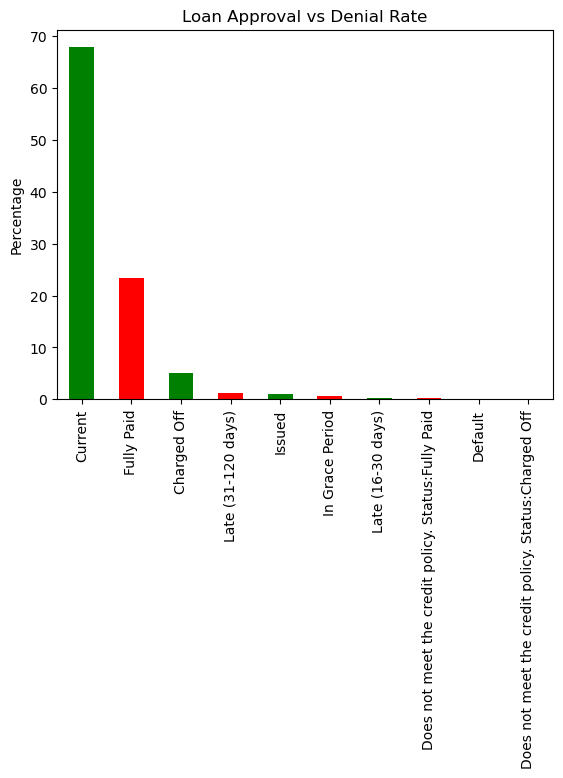

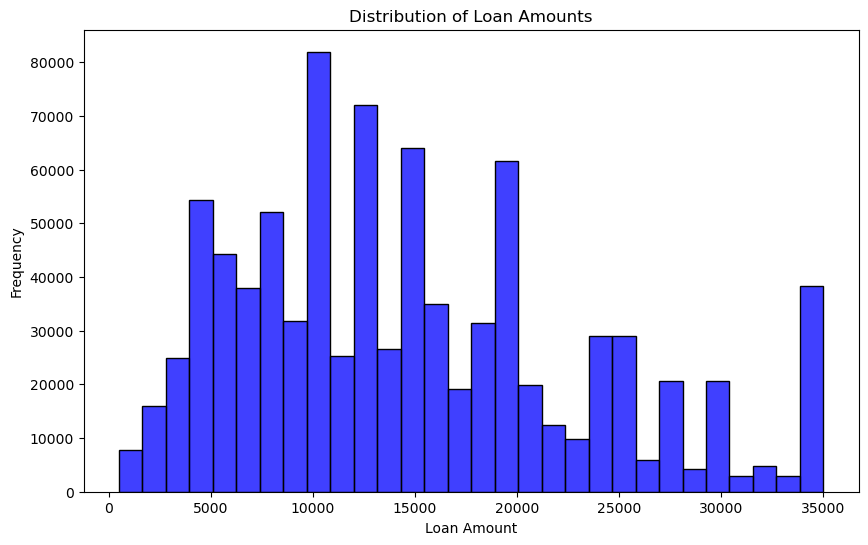

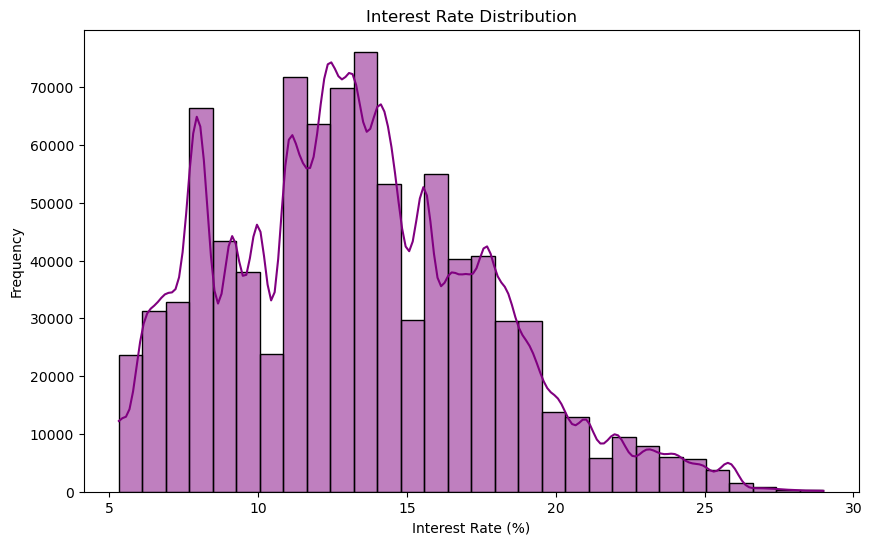

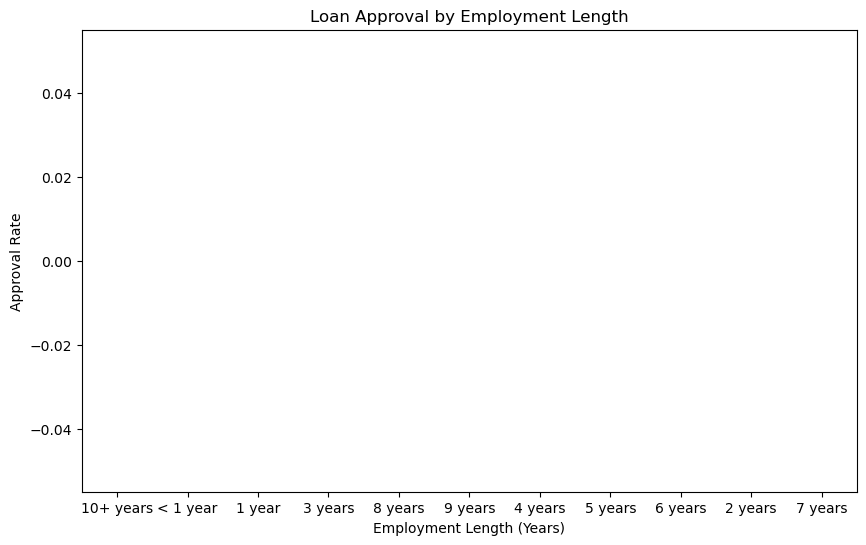

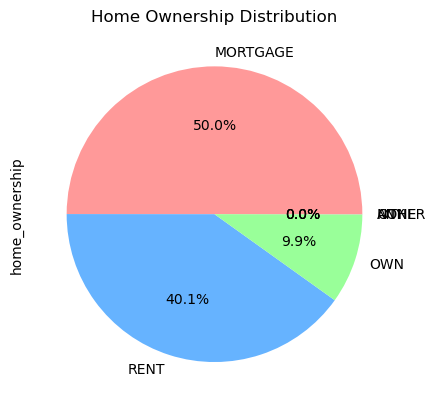

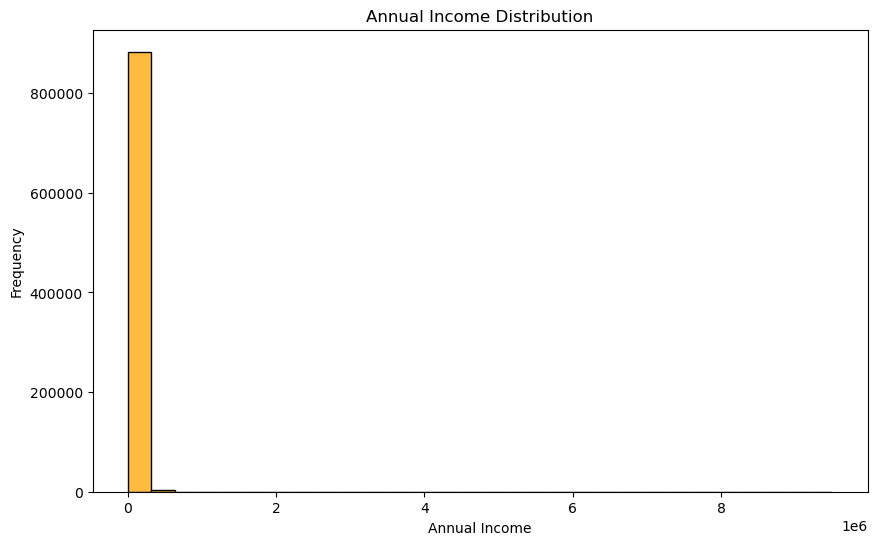

KeyError: 'days_since_last_credit_pull'

<Figure size 1000x600 with 0 Axes>

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Feature 1: Loan Approval Rate
approval_rate = loan_df['loan_status'].value_counts(normalize=True) * 100
approval_rate.plot(kind='bar', color=['green', 'red'])
plt.title('Loan Approval vs Denial Rate')
plt.ylabel('Percentage')
plt.show()

# Feature 2: Distribution of Loan Amounts
plt.figure(figsize=(10, 6))
sns.histplot(loan_df['loan_amnt'], bins=30, kde=False, color='blue')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Feature 3: Interest Rate Distribution
plt.figure(figsize=(10, 6))
sns.histplot(loan_df['int_rate'], bins=30, kde=True, color='purple')
plt.title('Interest Rate Distribution')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.show()

# Convert loan_status to numeric if it's categorical
loan_df['loan_status_numeric'] = loan_df['loan_status'].apply(lambda x: 1 if x == 'Approved' else 0)

# Now plot the bar chart with numeric values
plt.figure(figsize=(10, 6))
sns.barplot(x='emp_length', y='loan_status_numeric', data=loan_df, errorbar=None)
plt.title('Loan Approval by Employment Length')
plt.xlabel('Employment Length (Years)')
plt.ylabel('Approval Rate')
plt.show()

# Feature 5: Home Ownership Analysis
loan_df['home_ownership'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Home Ownership Distribution')
plt.show()

# Feature 6: Income Distribution
plt.figure(figsize=(10, 6))
sns.histplot(loan_df['annual_inc'], bins=30, kde=False, color='orange')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

# Feature 7: Days Since Last Credit Pull
plt.figure(figsize=(10, 6))
sns.histplot(loan_df['days_since_last_credit_pull'], bins=30, kde=True, color='green')
plt.title('Days Since Last Credit Pull Distribution')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

# Feature 8: Credit Score Distribution (if applicable)
# Assuming there is a column for credit score in your dataset
plt.figure(figsize=(10, 6))
sns.histplot(loan_df['credit_score'], bins=30, kde=True, color='red')
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()


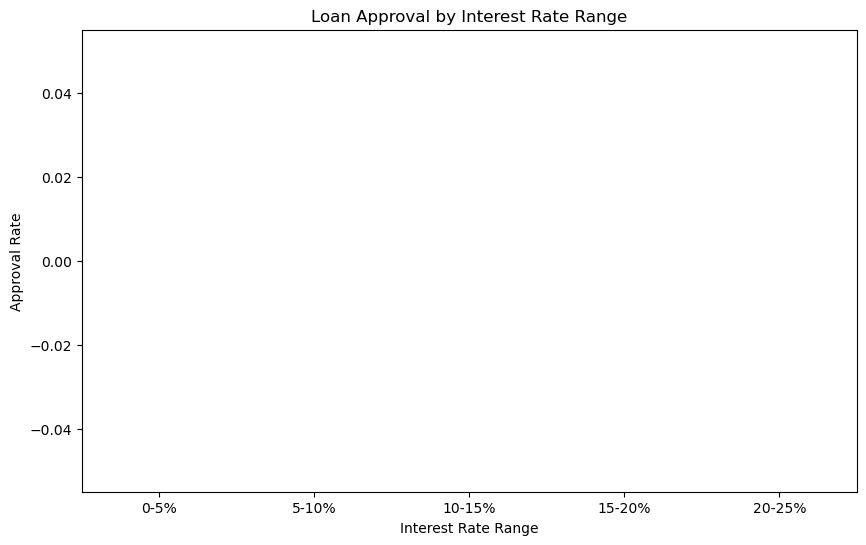

In [43]:
# Create interest rate bins to categorize loan approvals
loan_df['int_rate_range'] = pd.cut(loan_df['int_rate'], bins=[0, 5, 10, 15, 20, 25], labels=['0-5%', '5-10%', '10-15%', '15-20%', '20-25%'])

# Plot loan approval rate by interest rate range
plt.figure(figsize=(10, 6))
sns.barplot(x='int_rate_range', y='loan_status_numeric', data=loan_df, errorbar=None)
plt.title('Loan Approval by Interest Rate Range')
plt.xlabel('Interest Rate Range')
plt.ylabel('Approval Rate')
plt.show()

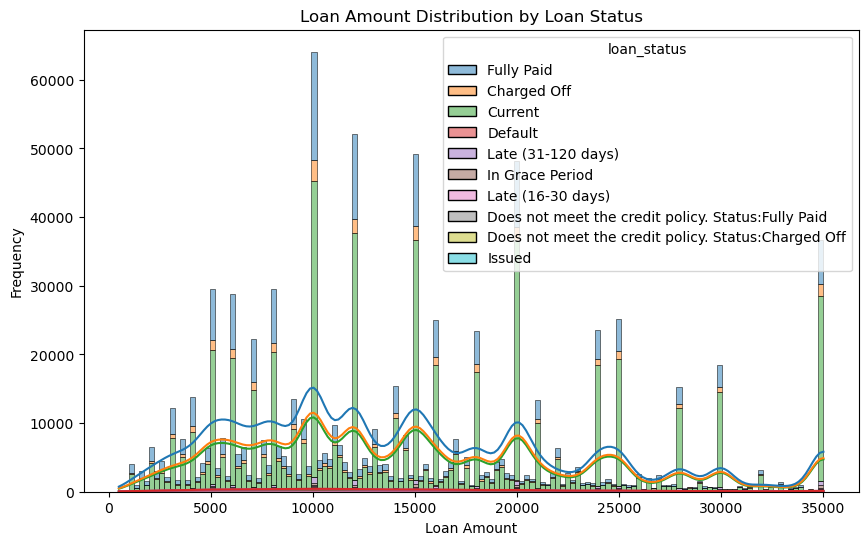

In [44]:
# Plot the distribution of loan amounts by loan status
plt.figure(figsize=(10, 6))
sns.histplot(data=loan_df, x='loan_amnt', hue='loan_status', multiple='stack', kde=True)
plt.title('Loan Amount Distribution by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

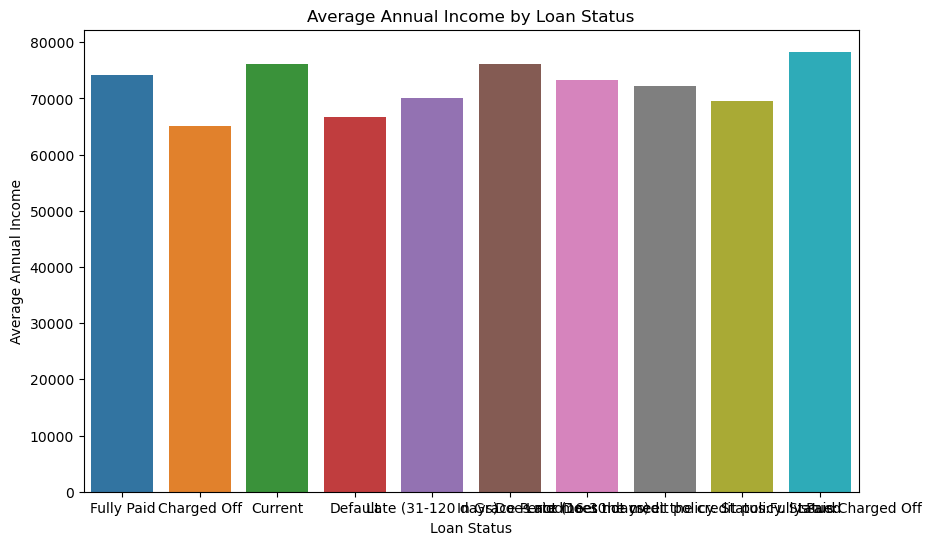

In [45]:
# Plot the average annual income for approved and denied loans
plt.figure(figsize=(10, 6))
sns.barplot(x='loan_status', y='annual_inc', data=loan_df, errorbar=None)
plt.title('Average Annual Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Average Annual Income')
plt.show()

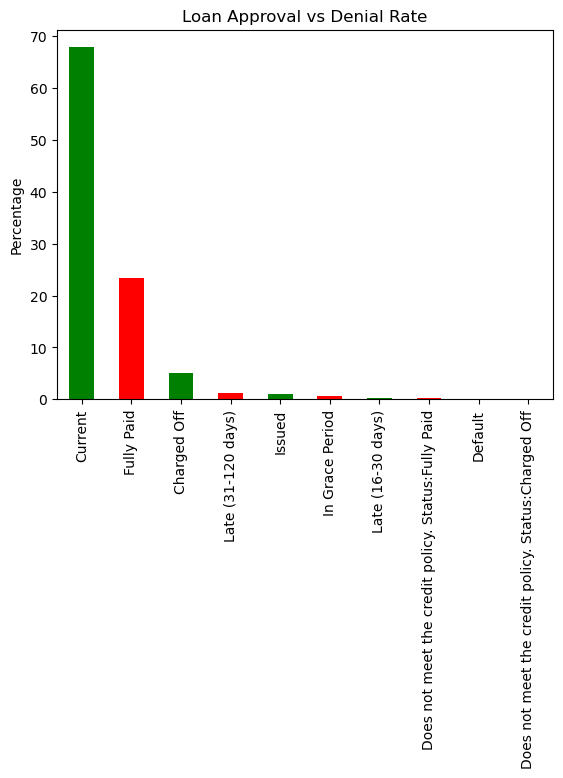

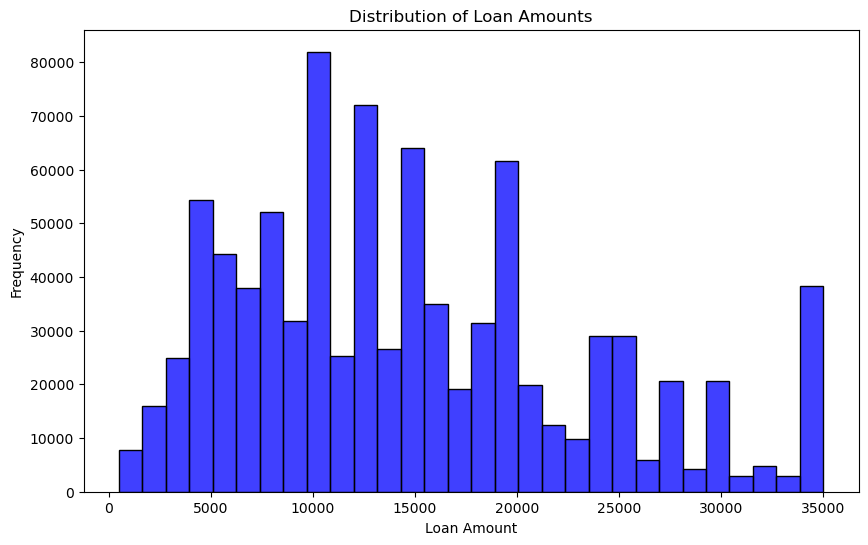

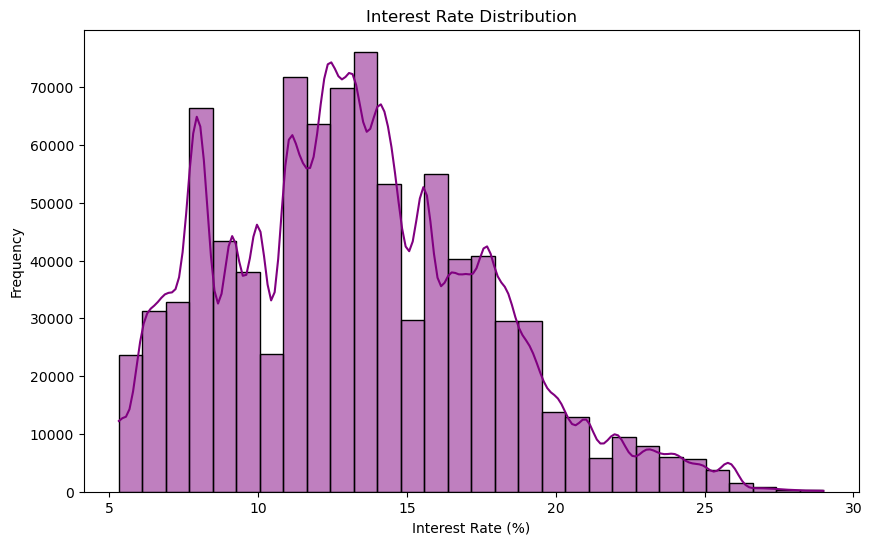

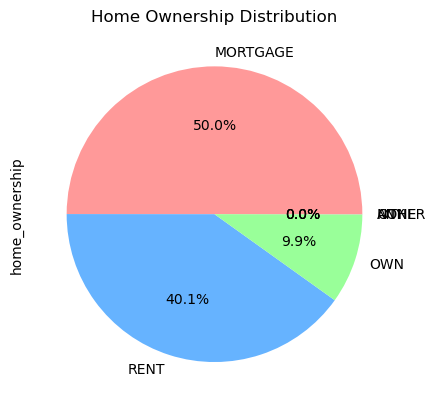

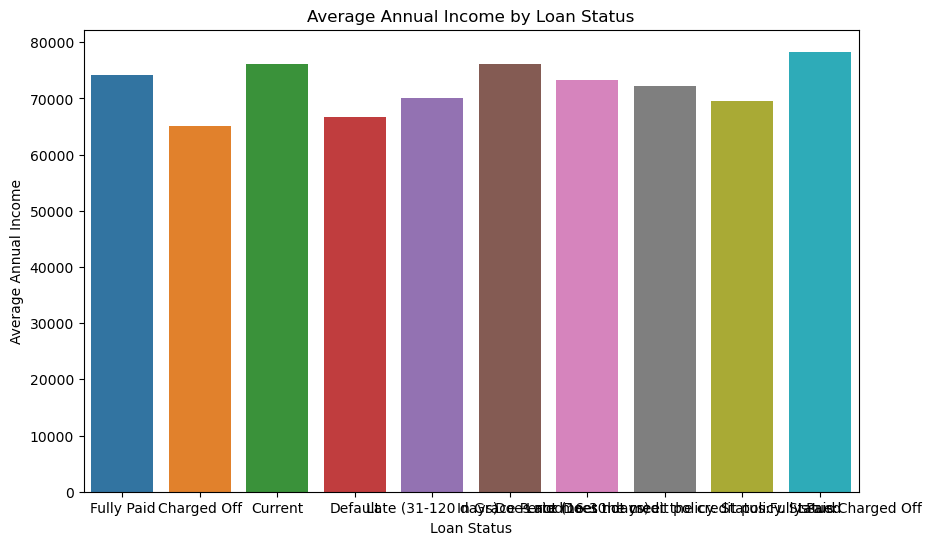

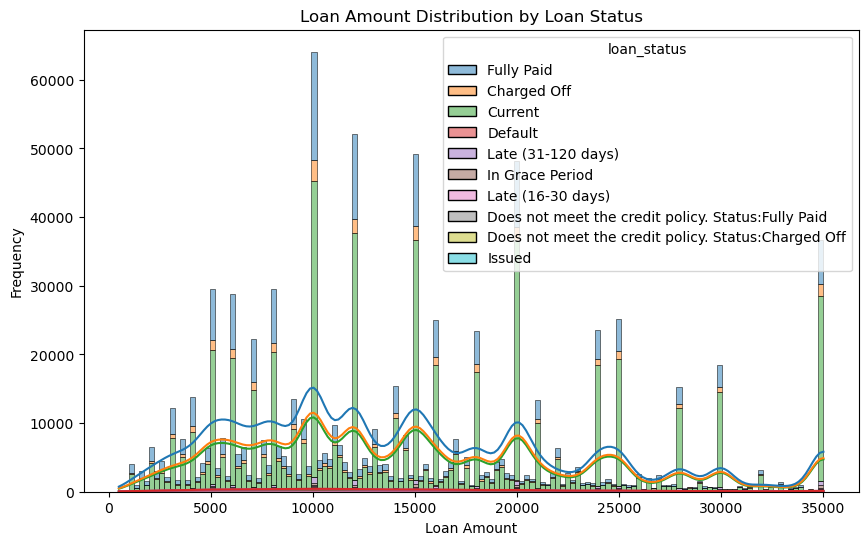

IntSlider(value=1000, description='Loan Amount:', max=40000, min=1000, step=1000)

FloatSlider(value=5.0, description='Interest Rate:', max=30.0, min=5.0)

IntSlider(value=0, description='Employment Length:', max=40)

IntSlider(value=10000, description='Annual Income:', max=500000, min=10000, step=10000)

Dropdown(description='Home Ownership:', options=('RENT', 'OWN', 'MORTGAGE'), value='RENT')

IntSlider(value=0, description='Days Until Next Payment:', max=365)

IntSlider(value=0, description='Days Since Last Credit Pull:', max=365)

Button(description='Predict Loan Approval', style=ButtonStyle())

Loan Denied


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21328\1831219076.py:100: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_data[col] = 0  # You can adjust default values based on your dataset
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21328\1831219076.py:100: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_data[col] = 0  # You can adjust default values based on your dataset
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21328\1831219076.py:100: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

Loan Denied


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21328\1831219076.py:100: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_data[col] = 0  # You can adjust default values based on your dataset
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21328\1831219076.py:100: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_data[col] = 0  # You can adjust default values based on your dataset
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21328\1831219076.py:100: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

Loan Denied


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21328\1831219076.py:100: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_data[col] = 0  # You can adjust default values based on your dataset
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21328\1831219076.py:100: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_data[col] = 0  # You can adjust default values based on your dataset
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21328\1831219076.py:100: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

Loan Denied


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21328\1831219076.py:100: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_data[col] = 0  # You can adjust default values based on your dataset
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21328\1831219076.py:100: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_data[col] = 0  # You can adjust default values based on your dataset
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21328\1831219076.py:100: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

Loan Denied


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21328\1831219076.py:100: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_data[col] = 0  # You can adjust default values based on your dataset
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21328\1831219076.py:100: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_data[col] = 0  # You can adjust default values based on your dataset
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21328\1831219076.py:100: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

Loan Denied


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21328\1831219076.py:100: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_data[col] = 0  # You can adjust default values based on your dataset
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21328\1831219076.py:100: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_data[col] = 0  # You can adjust default values based on your dataset
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21328\1831219076.py:100: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

In [46]:
# Required imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import joblib
from sklearn.preprocessing import LabelEncoder

# Load the dataset (assuming you have 'loan_df')
# loan_df = pd.read_csv('path_to_your_dataset.csv')

# Assuming your dataset is already loaded in `loan_df`
# Static Visualizations

# Feature 1: Loan Approval Rate
approval_rate = loan_df['loan_status'].value_counts(normalize=True) * 100
approval_rate.plot(kind='bar', color=['green', 'red'])
plt.title('Loan Approval vs Denial Rate')
plt.ylabel('Percentage')
plt.show()

# Feature 2: Distribution of Loan Amounts
plt.figure(figsize=(10, 6))
sns.histplot(loan_df['loan_amnt'], bins=30, kde=False, color='blue')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Feature 3: Interest Rate Distribution
plt.figure(figsize=(10, 6))
sns.histplot(loan_df['int_rate'], bins=30, kde=True, color='purple')
plt.title('Interest Rate Distribution')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.show()

# Feature 4: Home Ownership Analysis
loan_df['home_ownership'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Home Ownership Distribution')
plt.show()

# Feature 5: Average Annual Income by Loan Status
plt.figure(figsize=(10, 6))
sns.barplot(x='loan_status', y='annual_inc', data=loan_df, errorbar=None)
plt.title('Average Annual Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Average Annual Income')
plt.show()

# Feature 6: Loan Amount Distribution by Loan Status
plt.figure(figsize=(10, 6))
sns.histplot(data=loan_df, x='loan_amnt', hue='loan_status', multiple='stack', kde=True)
plt.title('Loan Amount Distribution by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Interactive Widgets for Loan Prediction

# Load the saved model
model = joblib.load('xgb_model.pkl')

# Get the expected feature names from the model
expected_features = model.feature_names_in_

# Create input widgets
loan_amnt = widgets.IntSlider(min=1000, max=40000, step=1000, description="Loan Amount:")
int_rate = widgets.FloatSlider(min=5.0, max=30.0, step=0.1, description="Interest Rate:")
emp_length = widgets.IntSlider(min=0, max=40, step=1, description="Employment Length:")
annual_income = widgets.IntSlider(min=10000, max=500000, step=10000, description="Annual Income:")
home_ownership = widgets.Dropdown(options=['RENT', 'OWN', 'MORTGAGE'], description="Home Ownership:")
days_until_next_pymnt = widgets.IntSlider(min=0, max=365, step=1, description="Days Until Next Payment:")
days_since_last_credit_pull = widgets.IntSlider(min=0, max=365, step=1, description="Days Since Last Credit Pull:")

# Create a button to trigger the prediction
button = widgets.Button(description="Predict Loan Approval")

# Define a function to run when the button is clicked
def on_button_click(b):
    # Input data should have the same features as the model was trained on
    input_data = pd.DataFrame({
        'loan_amnt': [loan_amnt.value],
        'int_rate': [int_rate.value],
        'emp_length': [emp_length.value],
        'annual_inc': [annual_income.value],
        'home_ownership': [home_ownership.value],
        'days_until_next_pymnt': [days_until_next_pymnt.value],
        'days_since_last_credit_pull': [days_since_last_credit_pull.value]
    })

    # Encode the categorical column 'home_ownership'
    le = LabelEncoder()
    input_data['home_ownership'] = le.fit_transform(input_data['home_ownership'])

    # Add missing columns
    missing_cols = set(expected_features) - set(input_data.columns)
    for col in missing_cols:
        input_data[col] = 0  # You can adjust default values based on your dataset

    # Reorder columns to match the order expected by the model
    input_data = input_data[expected_features]

    # Predict using the model
    prediction = model.predict(input_data)

    if prediction[0] == 1:
        print("Loan Approved")
    else:
        print("Loan Denied")

# Link the button to the prediction function
button.on_click(on_button_click)

# Display the widgets and the button
display(loan_amnt, int_rate, emp_length, annual_income, home_ownership, days_until_next_pymnt, days_since_last_credit_pull, button)


In [47]:
# Required imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, HTML
import joblib
from sklearn.preprocessing import LabelEncoder

# Add some CSS styling for the layout
display(HTML("<style>.container { width:90% !important; }</style>"))

# Section 1: Static Visualizations
def display_static_visuals():
    # Static Visualizations
    output_static = widgets.Output()

    with output_static:
        # Feature 1: Loan Approval Rate
        plt.figure(figsize=(6, 4))
        approval_rate = loan_df['loan_status'].value_counts(normalize=True) * 100
        approval_rate.plot(kind='bar', color=['green', 'red'])
        plt.title('Loan Approval vs Denial Rate')
        plt.ylabel('Percentage')
        plt.show()

        # Feature 2: Distribution of Loan Amounts
        plt.figure(figsize=(6, 4))
        sns.histplot(loan_df['loan_amnt'], bins=30, kde=False, color='blue')
        plt.title('Distribution of Loan Amounts')
        plt.xlabel('Loan Amount')
        plt.ylabel('Frequency')
        plt.show()

        # Feature 3: Interest Rate Distribution
        plt.figure(figsize=(6, 4))
        sns.histplot(loan_df['int_rate'], bins=30, kde=True, color='purple')
        plt.title('Interest Rate Distribution')
        plt.xlabel('Interest Rate (%)')
        plt.ylabel('Frequency')
        plt.show()

        # Feature 4: Home Ownership Analysis
        plt.figure(figsize=(6, 4))
        loan_df['home_ownership'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
        plt.title('Home Ownership Distribution')
        plt.show()

        # Feature 5: Average Annual Income by Loan Status
        plt.figure(figsize=(6, 4))
        sns.barplot(x='loan_status', y='annual_inc', data=loan_df, errorbar=None)
        plt.title('Average Annual Income by Loan Status')
        plt.xlabel('Loan Status')
        plt.ylabel('Average Annual Income')
        plt.show()

        # Feature 6: Loan Amount Distribution by Loan Status
        plt.figure(figsize=(6, 4))
        sns.histplot(data=loan_df, x='loan_amnt', hue='loan_status', multiple='stack', kde=True)
        plt.title('Loan Amount Distribution by Loan Status')
        plt.xlabel('Loan Amount')
        plt.ylabel('Frequency')
        plt.show()

    return output_static

# Section 2: Interactive Widgets for Loan Prediction
def display_interactive_widgets():
    # Load the saved model
    model = joblib.load('xgb_model.pkl')

    # Get the expected feature names from the model
    expected_features = model.feature_names_in_

    # Create input widgets
    loan_amnt = widgets.IntSlider(min=1000, max=40000, step=1000, description="Loan Amount:")
    int_rate = widgets.FloatSlider(min=5.0, max=30.0, step=0.1, description="Interest Rate:")
    emp_length = widgets.IntSlider(min=0, max=40, step=1, description="Employment Length:")
    annual_income = widgets.IntSlider(min=10000, max=500000, step=10000, description="Annual Income:")
    home_ownership = widgets.Dropdown(options=['RENT', 'OWN', 'MORTGAGE'], description="Home Ownership:")
    days_until_next_pymnt = widgets.IntSlider(min=0, max=365, step=1, description="Days Until Next Payment:")
    days_since_last_credit_pull = widgets.IntSlider(min=0, max=365, step=1, description="Days Since Last Credit Pull:")

    # Create a button to trigger the prediction
    button = widgets.Button(description="Predict Loan Approval", button_style='success')

    # Define a function to run when the button is clicked
    def on_button_click(b):
        # Input data should have the same features as the model was trained on
        input_data = pd.DataFrame({
            'loan_amnt': [loan_amnt.value],
            'int_rate': [int_rate.value],
            'emp_length': [emp_length.value],
            'annual_inc': [annual_income.value],
            'home_ownership': [home_ownership.value],
            'days_until_next_pymnt': [days_until_next_pymnt.value],
            'days_since_last_credit_pull': [days_since_last_credit_pull.value]
        })

        # Encode the categorical column 'home_ownership'
        le = LabelEncoder()
        input_data['home_ownership'] = le.fit_transform(input_data['home_ownership'])

        # Add missing columns
        missing_cols = set(expected_features) - set(input_data.columns)
        for col in missing_cols:
            input_data[col] = 0  # Adjust default values based on your dataset

        # Reorder columns to match the order expected by the model
        input_data = input_data[expected_features]

        # Predict using the model
        prediction = model.predict(input_data)

        if prediction[0] == 1:
            output_prediction.clear_output()
            with output_prediction:
                print("Loan Approved ✅")
        else:
            output_prediction.clear_output()
            with output_prediction:
                print("Loan Denied ❌")

    # Link the button to the prediction function
    button.on_click(on_button_click)

    # Display the widgets and the button in a grid layout
    form_items = [
        widgets.VBox([loan_amnt, int_rate, emp_length]),
        widgets.VBox([annual_income, home_ownership, days_until_next_pymnt, days_since_last_credit_pull])
    ]
    form_box = widgets.HBox(form_items)

    # Output section for prediction result
    global output_prediction
    output_prediction = widgets.Output()

    return widgets.VBox([form_box, button, output_prediction])

# Section 3: Putting Everything Together in a Beautiful Layout
header = widgets.HTML(value="<h2>Loan Prediction Dashboard</h2>")

# Split the dashboard into two sections: static and interactive
static_visuals = display_static_visuals()
interactive_widgets = display_interactive_widgets()

# Arrange them in a vertical layout
dashboard_layout = widgets.VBox([
    header,
    static_visuals,
    widgets.HTML(value="<h3>Loan Prediction Input Form</h3>"),
    interactive_widgets
])

# Display the full dashboard layout
dashboard_layout

In [48]:
import joblib

# Assuming `xgb_model` is your trained XGBoost model
joblib.dump(xgb_model, 'xgb_model.pkl')

['xgb_model.pkl']

In [49]:
import os
print(os.getcwd())  # This will print the current working directory path

C:\Users\ASUS
